In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from defs import plot_decision_regions

In [104]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [105]:
path="/content/drive/MyDrive/SPAM/UCIspamDataset/"
data_set_path = path + 'sms_spam_svm.csv'
my_data = pd.read_csv(data_set_path)

In [106]:
my_data

,type,suspect,neutral
0,ham,1,3
1,ham,49,30
2,spam,47,32
3,ham,46,31
4,ham,0,36
...,...,...,...
145,ham,67,30
146,ham,63,2
147,spam,6,30
148,ham,62,34


In [107]:
my_data.shape

(150, 3)

In [108]:
y_data = my_data.iloc[:,0].values
y_data = np.where(y_data == 'spam', -1, 1)
x_data = my_data.iloc[:, [1,2]].values

In [121]:
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3)
support_vector_machine = SVC(kernel='linear', C=1.0, random_state=1)
support_vector_machine.fit(X_train, y_train)
svm_pred = support_vector_machine.predict(X_test)

Plotting SVM values 


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
/content/defs.py:65: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  s=55, label='test set')


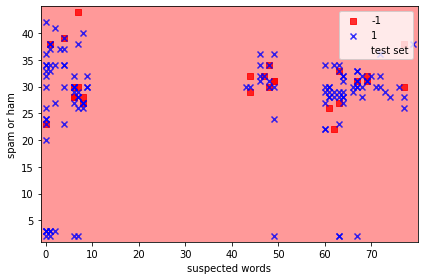

In [122]:
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, classifier =support_vector_machine, test_idx=range(-15,15))
plt.xlabel("suspected words")
plt.ylabel("spam or ham")
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

In [123]:
print("Missed values: ", (y_test != svm_pred).sum())

Missed values:  5


In [120]:
print("Accuracy: %.2f"%(accuracy_score(y_test, svm_pred)))

Accuracy: 0.73
